 ## What is EDA?
##### . Data-point/vector/Observation
##### . Data-set.
##### . Feature/Variable/Input-variable/Dependent-varibale
##### . Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
##### . Vector: 2-D, 3-D, 4-D,.... n-D
##### . Q. What is a 1-D vector: Scalar

## . Iris Flower dataset
##### . Toy Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]

##### . A simple dataset to learn the basics.
##### . 3 flowers of Iris species. [see images on wikipedia link above]
##### . 1936 by Ronald Fisher.
##### Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
##### Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
##### Importance of domain knowledge.
##### Why use petal and sepal dimensions as features?
##### Why do we not use 'color' as a feature?

## Exploratory Data Analysis on Haberman Dataset
### 1- 1-Reading data/loading data

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.seterr(invalid='ignore')
#loading haberman.csv into a pandas dataframe.
cancer_df=pd.read_csv('/Users/sandipsutar/Downloads/Assignment 4 /haberman.csv')
cancer_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [33]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [34]:
print(cancer_df.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [35]:
# modify the target column values to be meaningful as well as categorical
cancer_df['status'] = cancer_df['status'].replace({1:"1", 2:"2"})

print(cancer_df.head())

   age  year  nodes status
0   30    64      1      1
1   30    62      3      1
2   30    65      0      1
3   31    59      2      1
4   31    65      4      1


In [36]:
# 1st row of the dataset.
cancer_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### (Q)-How many dada-points and features?



In [37]:
print (cancer_df.shape)

(306, 4)


### (Q)- What are the column name in our dataset?

In [38]:
print(cancer_df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [39]:
# last row of dataset
cancer_df.tail(7)

,age,year,nodes,status
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


### (Q)- How many data points for each class are present?

In [40]:
cancer_df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# 2 . Objective

### 2 - To find and predict whether the patients will survive the given treatment or not.

# 3 . Univariate Analysis

### PDF PLOT 1 CORRESPONDING TO AGE FEATURE

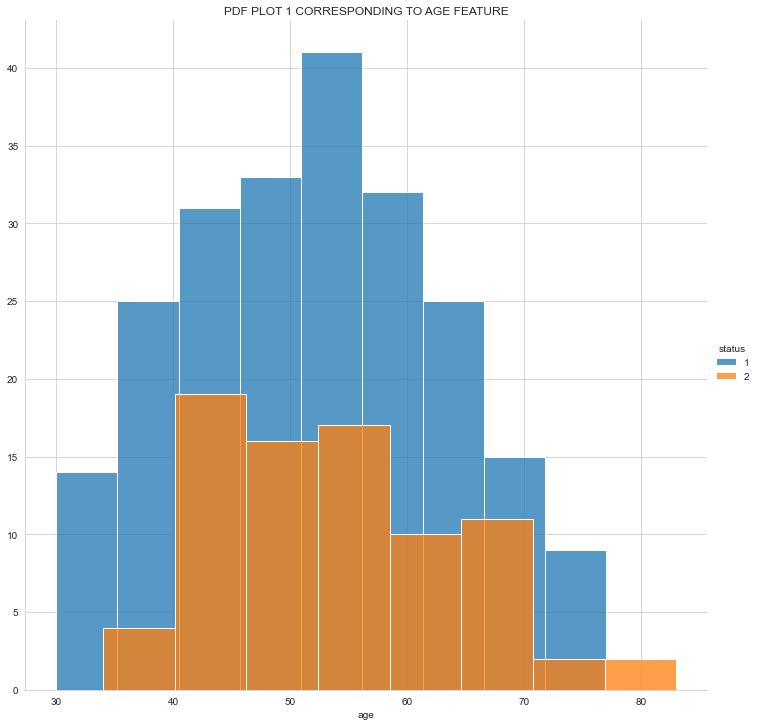

In [41]:
sns.FacetGrid(cancer_df, hue ='status',height = 10).map(sns.histplot,'age').add_legend();
plt.title("PDF PLOT 1 CORRESPONDING TO AGE FEATURE")
plt.show();

### Observation-
#### 1- This histogram PDF Graph overlap each other.
#### 2- Orange area shows that people within 40-63 are more likely to die.
#### 3- People less than 40 which is orange area are more like to survive.

### PDF PLOT 1 CORRESPONDING TO OPERATION_YEAR FEATURE

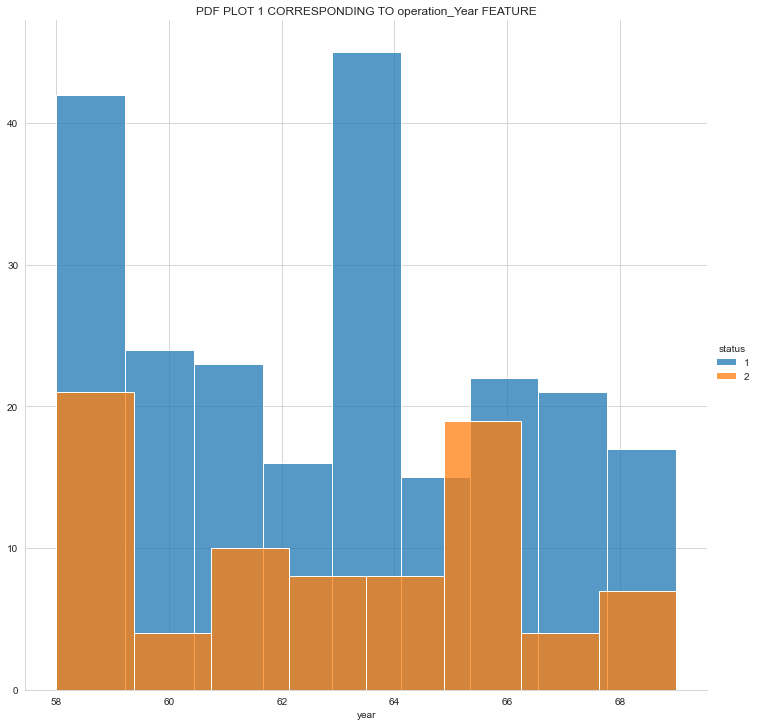

In [42]:

sns.FacetGrid(cancer_df, hue ='status',height = 10).map(sns.histplot,'year').add_legend();
plt.title("PDF PLOT 1 CORRESPONDING TO operation_Year FEATURE")
plt.show();

### Observation-
#### 1- This PDF graph are again overlapping with there respective class.
#### 2- This PDF graph shows the patients whose operation was done in between 58 to 65 id died.

### PDF PLOT 1 CORRESPONDING TO axil_nodes

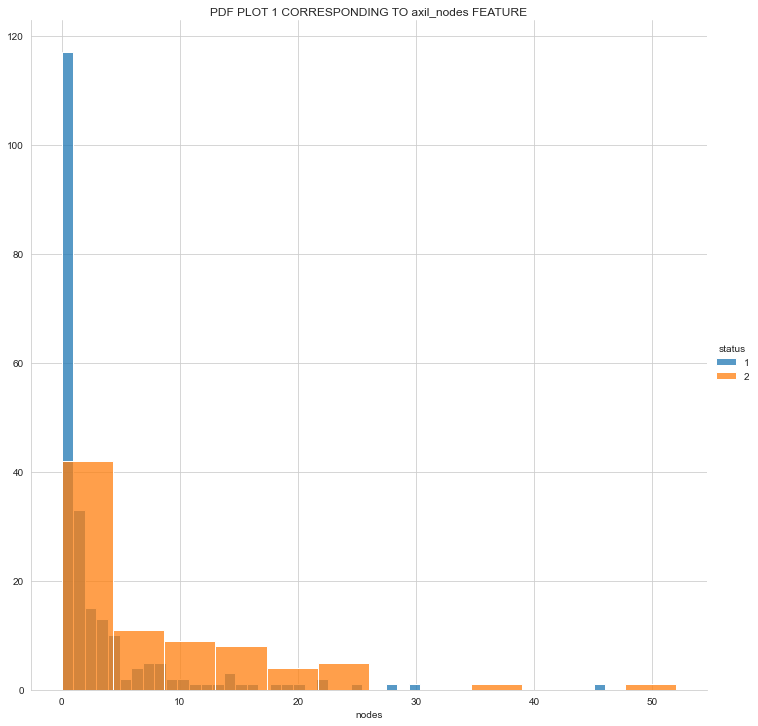

In [43]:
sns.FacetGrid(cancer_df, hue ='status',height = 10).map(sns.histplot,'nodes').add_legend();
plt.title("PDF PLOT 1 CORRESPONDING TO axil_nodes FEATURE")
plt.show();

### Observation-
#### 1- A less overlapping among the classes observed.
#### 2- Patient having 0 axil nodes will survive.


## 3.2-Plotiing a CDF Graph

In [44]:
class_1=cancer_df.loc[cancer_df["status"]==1]
class_2=cancer_df.loc[cancer_df["status"]==2]

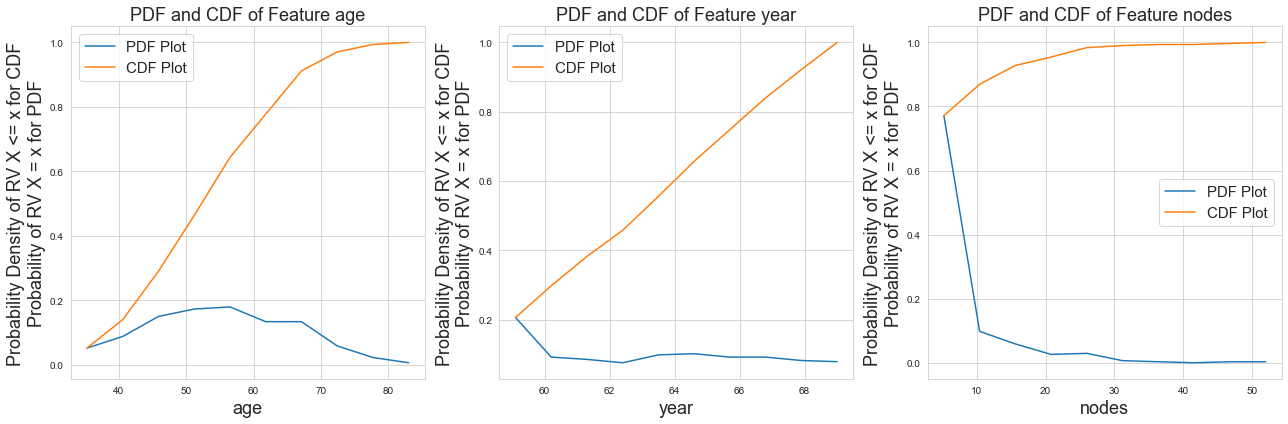

In [64]:
plt.figure(figsize=(18,6))

for idx, feature in enumerate(cancer_df.columns[:-1]):
    
    plt.subplot(1, 3, (1+idx))
    
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    PDF = counts/sum(counts)
    CDF = np.cumsum(PDF)
    
    plt.plot(bin_edges[1:], PDF, label="PDF Plot")
    plt.plot(bin_edges[1:], CDF, label="CDF Plot")
    
    plt.title(f"PDF and CDF of Feature {feature}", fontsize=18)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel("Probability Density of RV X <= x for CDF\nProbability of RV X = x for PDF", fontsize=18)
    plt.legend(fontsize=15)
    
plt.tight_layout()
plt.show()

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


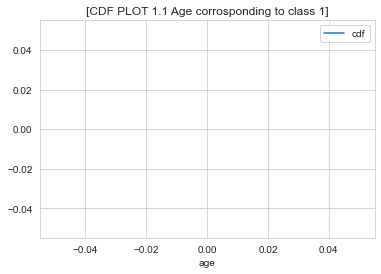

In [69]:
#age feature corrosponding to the class_1
counts, bin_edges = np.histogram(class_1['age'], bins=10 ,density  = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title("[CDF PLOT 1.1 Age corrosponding to class 1]")
plt.legend()
plt.show()

### #Conclusion:
#### 1. It is clear that patients having age between 50 to 60 have greater rate of survival. 
#### 2. Almost 90% patient who survived have the age less than or equal to 70

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


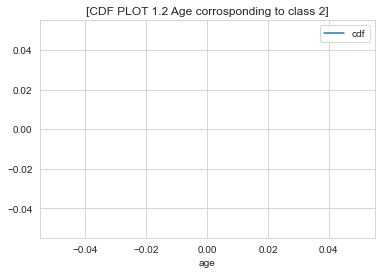

In [47]:
#age feature corrosponding to the class_2
counts, bin_edges = np.histogram(class_2['age'], bins=10 ,density  = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title("[CDF PLOT 1.2 Age corrosponding to class 2]")
plt.legend()
plt.show()

### Conclusion:

#### 1-It is observed that around 74% of patient who died within 5 years have an age less than or equal to 60 years.

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


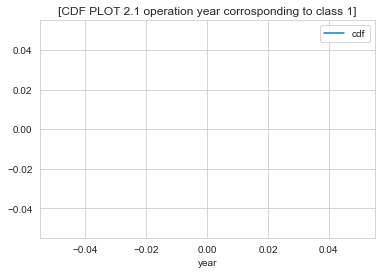

In [48]:
# operation_year corrosponding to class_1
counts, bin_edges = np.histogram(class_1['year'], bins=10 ,density  = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('year')
plt.title("[CDF PLOT 2.1 operation year corrosponding to class 1]")
plt.legend()
plt.show()


### #Conclusion:

#### 1. It is observed that 60% patients are undergoing surgery before the year 1964 and survived.

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


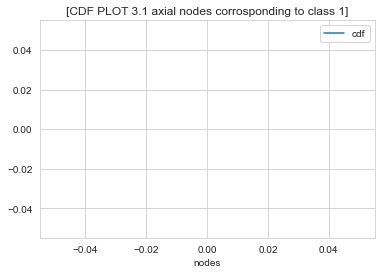

In [71]:
counts, bin_edges = np.histogram(class_1['nodes'], bins=10 ,density  = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title("[CDF PLOT 3.1 axial nodes corrosponding to class 1]")
plt.legend()
plt.show()

### #Conclusion:

#### 1. It is observed that amost 85% of patients who survived have axil nodes less than 10. Hence lower the axle nodes, greater the       chances of survival.

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


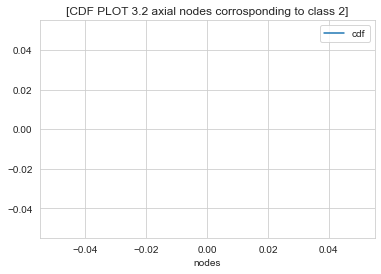

In [50]:
counts, bin_edges = np.histogram(class_2['nodes'], bins=10 ,density  = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title("[CDF PLOT 3.2 axial nodes corrosponding to class 2]")
plt.legend()
plt.show()

### #Conclusion:

#### 1-It is observed that around 96% of patients who died within 5 years on surgery have acle nodes less than or equal to 28.

# 3.1 Box Plot

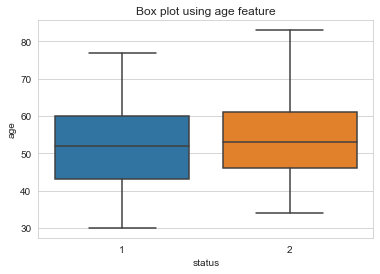

In [51]:
sns.boxplot(x='status',y='age', data=cancer_df)
plt.title("Box plot using age feature")
plt.show()


### Conclusion:

#### 1. It is clear that almost 95% of data points are overlapping with almost same median. Hence, age feature is not sufficient to find out the exact scenario.

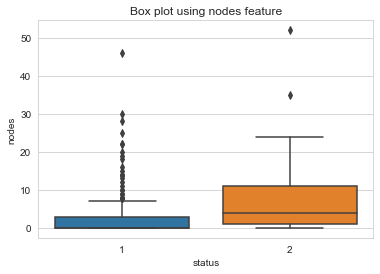

In [52]:
sns.boxplot(x='status',y='nodes', data=cancer_df)
plt.title("Box plot using nodes feature")
plt.show()

## Conclusion:

#### 1. It is observed that box plot of class 1 have outliers and also visible that around 50% of patients have axil nodes less than or equal to 3.

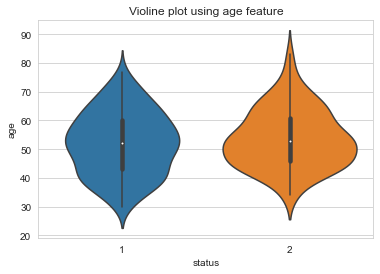

In [53]:
sns.violinplot(x="status", y="age", data=cancer_df, size=8)
plt.title("Violine plot using age feature")
plt.show()

## Conclusion:

#### 1. Overlapping is seen among both the plots for class 1 and class_2 upto 95%.

#### 2. So, age feature is not sufficient to interpret.

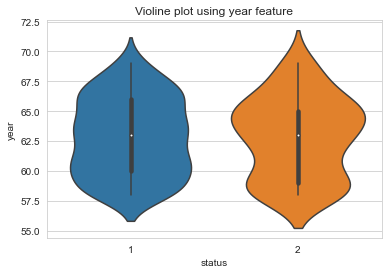

In [54]:
sns.violinplot(x="status", y="year", data=cancer_df, size=8)
plt.title("Violine plot using year feature")
plt.show()

## Conclusion:

#### 1. Overlapping is seen among both the plots for class 1 and class_2 upto 90%.
#### 2. So, operation year feature is not sufficient to interpret.

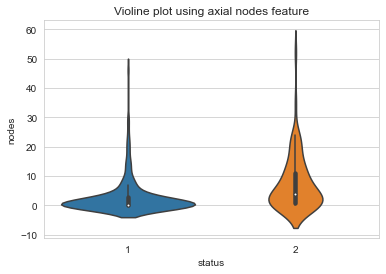

In [55]:
sns.violinplot(x="status", y="nodes", data=cancer_df, size=8)
plt.title("Violine plot using axial nodes feature")
plt.show()

## Conclusions:

#### 1. The survived patients have axil nodes equal to zero.

#### 2. Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective        patient is more likely to die.

# 4.1 - Bivariate analysis

## 2D Scatter plot

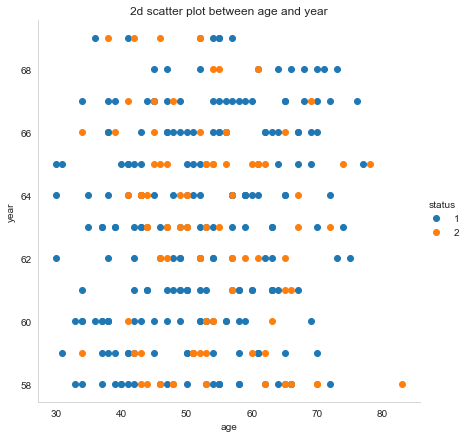

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_df, hue ="status", height=6).map(plt.scatter, "age", "year").add_legend(); 
plt.title('2d scatter plot between age and year')
plt.grid()
plt.show()

## Observation(s):

#### 1- Here there is an overlap of around 85%-90%. So we can't classify survival of patients on the basis of Age and Operation Year .
#### 2-We cannot make much sense out it.

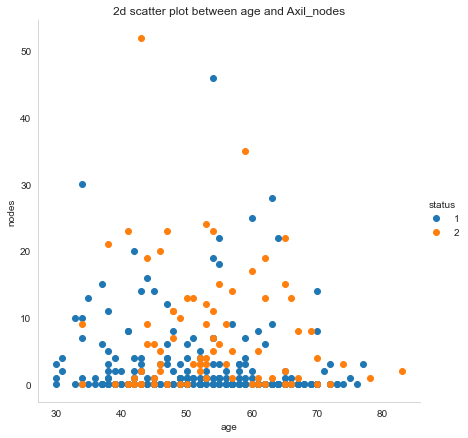

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_df, hue ="status", height=6).map(plt.scatter, "age", "nodes").add_legend(); 
plt.title('2d scatter plot between age and Axil_nodes')
plt.grid()
plt.show()

## Observation(s):
#### 1- Here there is an overlap of around 85%-90%. So we can't classify survival of patients on the basis of Age and Operation Year .
#### 2-We cannot make much sense out it.

# 4.2 - Pair plots


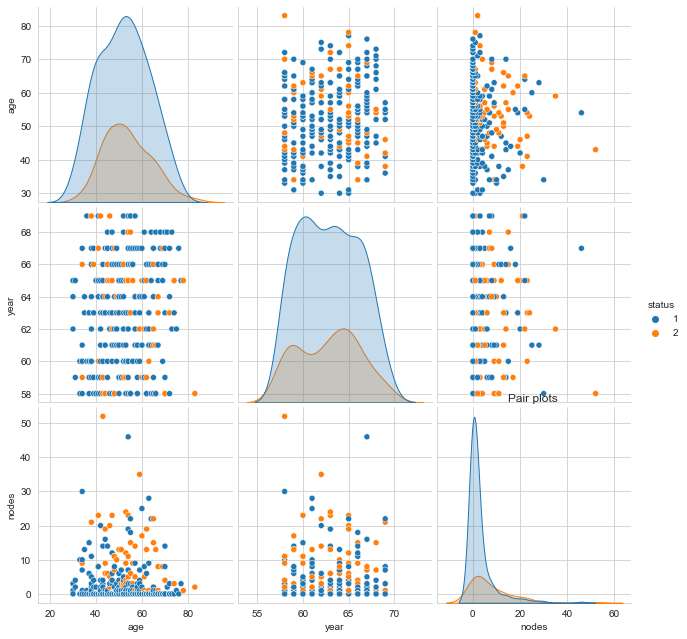

In [58]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue="status", height=3);
plt.title('Pair plots ')
plt.show()

## Conclusion:

#### (1). It is very difficult to predict the survival of the patients who had undergone surgery for breast cancer on the basis of these 3 features (1.e. Age, Operation Year and axil_nodes) because both the classes (1.e. 1 and 2) are almost 85%-90% overlapping with each other.

#### (2). These two classes are linearly inseparable due to intense overlapping.

#### (3). We should collect more useful features which are helpful in predicting the survival of the patients who had undergone the surgery for breast cancer.

#### (4). We need to use non-linear models then only we predict survival of the patients.

#### (5), axil_nodes is around 20% more useful feature than Age and Operation Year.

#### (6). Order of usefulness of features-> (axil_nodes  Followed by  Operation Year Followed  by Age ).